<a href="https://colab.research.google.com/github/hoooon89/DonkeyColab/blob/master/Copy_of_Copy_of_TrainDonkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Colab notebook to train your Donkey pilot in the cloud using free accelerated gpu machines.

Select a cell by clicking on it. Then click the left arrow to run, or ctrl+enter on your keyboard.


In [0]:
ls

sample_data/


In [0]:
!pip install --upgrade tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 58kB/s 
     |████████████████████████████████| 368kB 29.5MB/s 
ERROR: tensorflow 1.14.0rc1 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.14.0rc1
    Uninstalling tensorflow-estimator-1.14.0rc1:
      Successfully uninstalled tensorflow-estimator-1.14.0rc1


In [0]:
#make sure tensorflow is setup, and is using GPU
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

#if gpu is detected, you should see something like: '/device:GPU:0', if not, then no gpu is enabled.

1.13.1


'/device:GPU:0'

In [0]:
#install donkey from github
!git clone https://github.com/tawnkramer/donkey >> log.txt; pip install -e donkey >> log.txt

Cloning into 'donkey'...
remote: Enumerating objects: 6577, done.
remote: Total 6577 (delta 0), reused 0 (delta 0), pack-reused 6577
Receiving objects: 100% (6577/6577), 14.85 MiB | 15.57 MiB/s, done.
Resolving deltas: 100% (4001/4001), done.


In [0]:
#create a working dir from templates
!donkey createcar --path d2;

using donkey v2.6.0t ...
Creating car folder: d2
making dir  d2
Creating data & model folders.
making dir  d2/models
making dir  d2/data
making dir  d2/logs
Copying car application template: donkey2
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


In [0]:
ls

d2/  donkey/  log.txt  sample_data/


You will need to tar your files before uploading them. In your machine, do:

```
cd d2

tar -cf tub_data.tar data
```

to make a tar file with all your tubs in it. Then run the cell below to upload the tar file.


In [0]:
#this will upload your files

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tub_data.tar to tub_data.tar
User uploaded file "tub_data.tar" with length 145020416 bytes


In [0]:
#move tar and extract it, confirm that the data made it up there ok
!mv tub_data.tar d2; cd d2; tar -xf tub_data.tar;donkey tubcheck data/*

using donkey v2.6.0t ...
Checking tub:data/tub.
Found: 24969 records.
No problems found.


using donkey v2.6.0t ...


Using TensorFlow backend.


loading config file: d2/config.py
loading personal config over-rides

config loaded
batch size 128
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
training with model type <class 'donkeycar.parts.keras.KerasCategorical'>
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
cropping2d_1 (Cropping2D)       (None, 120, 160, 3)  0           img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 120, 16

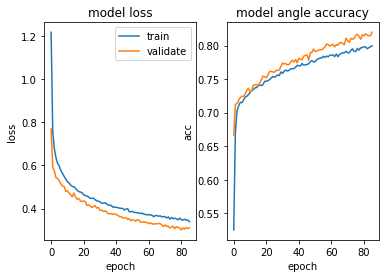

In [0]:
#start training!
import sys
sys.path.append('/content/d2')
sys.path.append('/content/donkey')
import donkeycar as dk
from train import multi_train

config_path = 'd2/config.py'
cfg = dk.load_config(config_path)

#You can change some settings here if you like
print('batch size', cfg.BATCH_SIZE)
tub = "/content/d2/data/*"
model = "/content/d2/models/mypilot.h5"
transfer = None
model_type = "categorical"
continuous = False
aug = False

multi_train(cfg, tub, model, transfer, model_type, continuous, aug)

In [0]:
#download the finished file:

from google.colab import files
files.download(model)